<a href="https://colab.research.google.com/github/SLVmain/Neural_Network_start/blob/Les_04/HW_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в искусственные нейронные сети
# Урок 4. Сверточные нейронные сети

# часть 1

## Практическое задание

Вариант 1. (простой)

- обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг  (conv-pool)-(conv-pool)-...) на датасете fashion-mnist или cifar10
- оценить рост точности при увеличении ширины сети (больше ядер)
- оценить рост точности при увеличении глубины сети (больше слоев)
- (опциционально)сравнить с точностью полносвязной сети для этой выборки
    </li>

Вариант 2. (сложный)
- реализовать нейронную сеть или стек из сверток (Concatenate) на сifar10.
- оценить рост точности при увеличении ширины сети (больше ядер), больше нитей.
- оценить рост точности при увеличении глубины сети (больше слоев)
    </li>
</ol>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from __future__ import print_function
import tensorflow.keras as keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, GlobalMaxPooling2D, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import os
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical, plot_model 
import random

In [2]:
metrics_list = []

In [3]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [4]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 
x_test /= 255 

y_train = to_categorical(y_train, 10) 
y_test = to_categorical(y_test, 10) 

# изменение размерности массива в 4D массив
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
# построим простую сеть и потестируем количество ядер
#  используем mnist, так как на нем быстрее)

N = [256, 128, 64, 32] # Кол-во ядер
for i in N:
  model1 = Sequential()
        
  model1.add(Conv2D(i, 3, padding='same', input_shape=(28,28,1), activation='relu'))
  model1.add(Conv2D(i, 3, padding='same', activation='relu'))
  model1.add(MaxPooling2D())

  model1.add(Flatten())

  model1.add(Dense(1024, activation='relu'))
  model1.add(Dense(512, activation='relu'))
  model1.add(Dense(10, activation='softmax'))

  model1.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  model1.fit(x_train, y_train, batch_size=128,  epochs=5, validation_data=(x_test, y_test), verbose=1)
  metrics_list = metrics_list + [['Conv2D - 2','pooling - 1', i, 'drop - No', round(model1.evaluate(x_test, y_test, verbose = 0)[1], 3)]]



Epoch 1/5
469/469 [==============================] - 26s 37ms/step - loss: 0.1098 - accuracy: 0.9648 - val_loss: 0.0463 - val_accuracy: 0.9863
Epoch 2/5
469/469 [==============================] - 17s 35ms/step - loss: 0.0354 - accuracy: 0.9891 - val_loss: 0.0331 - val_accuracy: 0.9894
Epoch 3/5
469/469 [==============================] - 16s 35ms/step - loss: 0.0186 - accuracy: 0.9940 - val_loss: 0.0493 - val_accuracy: 0.9867
Epoch 4/5
469/469 [==============================] - 16s 35ms/step - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.0442 - val_accuracy: 0.9876
Epoch 5/5
469/469 [==============================] - 16s 35ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.0462 - val_accuracy: 0.9878
Epoch 1/5
469/469 [==============================] - 9s 17ms/step - loss: 0.1166 - accuracy: 0.9635 - val_loss: 0.0447 - val_accuracy: 0.9855
Epoch 2/5
469/469 [==============================] - 8s 16ms/step - loss: 0.0337 - accuracy: 0.9896 - val_loss: 0.0402 - val_accuracy: 0.9869
E

In [9]:
#добавим слоев
model = Sequential()
       
model.add(Conv2D(256, 3, padding='same', input_shape=(28,28,1), activation='relu'))
model.add(Conv2D(256, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
    
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())
    
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
    
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(Conv2D(32, 3, padding='same', activation='relu'))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, batch_size=128,  epochs=10, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
469/469 [==============================] - 16s 33ms/step - loss: 0.1730 - accuracy: 0.9457 - val_loss: 0.0432 - val_accuracy: 0.9864
Epoch 2/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0490 - accuracy: 0.9854 - val_loss: 0.0442 - val_accuracy: 0.9872
Epoch 3/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0356 - accuracy: 0.9894 - val_loss: 0.0388 - val_accuracy: 0.9879
Epoch 4/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0283 - accuracy: 0.9912 - val_loss: 0.0665 - val_accuracy: 0.9804
Epoch 5/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0261 - accuracy: 0.9921 - val_loss: 0.0227 - val_accuracy: 0.9932
Epoch 6/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0215 - accuracy: 0.9936 - val_loss: 0.0293 - val_accuracy: 0.9926
Epoch 7/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0208 - accuracy: 0.9941 - val_loss: 0.0277 - val_accuracy:

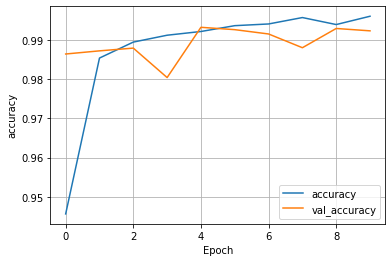

In [12]:
plot_accuracy(history)

In [13]:
metrics_list = metrics_list + [['Conv2D - 8','pooling - 2', '256-128-64-32', 'drop - No', round(model.evaluate(x_test, y_test, verbose = 0)[1], 3)]]

In [14]:
metrics_list

[['Conv2D - 2', 'pooling - 1', 256, 'drop - No', 0.988],
 ['Conv2D - 2', 'pooling - 1', 128, 'drop - No', 0.989],
 ['Conv2D - 2', 'pooling - 1', 64, 'drop - No', 0.991],
 ['Conv2D - 2', 'pooling - 1', 32, 'drop - No', 0.985],
 ['Conv2D - 8', 'pooling - 2', '256-128-64-32', 'drop - No', 0.992]]

С увеличением количества ядер и слоев точность увеличивается, но на mnist и простая сеть дает точность 99 процентов.

Дальше возьмем cifar10

In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

170508288/170498071 [==============================] - 3s 0us/step


In [16]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')
y_train[0]

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [17]:
metrics_list_cifar = []
N = [256, 128, 64, 32, 16, 8, 2, 1]
for i in N:
  model2 = Sequential()
            
  model2.add(Conv2D(i, 3, padding='same', input_shape=(32,32,3), activation='relu'))
  model2.add(Conv2D(i, 3, padding='same', activation='relu'))
  model2.add(MaxPooling2D())

  model2.add(Flatten())

  model2.add(Dense(1024, activation='relu'))
  #model2.add(Dense(512, activation='relu'))
  model2.add(Dense(10, activation='softmax'))

  model2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  model2.fit(x_train, y_train, batch_size=128,  epochs=20, validation_data=(x_test, y_test), verbose=1)
  metrics_list_cifar = metrics_list_cifar + [['Conv2D - 2','pooling - 1', i, 'drop - No', round(model2.evaluate(x_test, y_test, verbose = 0)[1], 3)]]

Epoch 1/20
391/391 [==============================] - 19s 46ms/step - loss: 1.4675 - accuracy: 0.4869 - val_loss: 1.1509 - val_accuracy: 0.5886
Epoch 2/20
391/391 [==============================] - 17s 43ms/step - loss: 0.9680 - accuracy: 0.6600 - val_loss: 0.9593 - val_accuracy: 0.6621
Epoch 3/20
391/391 [==============================] - 17s 43ms/step - loss: 0.7583 - accuracy: 0.7345 - val_loss: 0.9132 - val_accuracy: 0.6869
Epoch 4/20
391/391 [==============================] - 17s 44ms/step - loss: 0.5560 - accuracy: 0.8076 - val_loss: 0.9420 - val_accuracy: 0.6955
Epoch 5/20
391/391 [==============================] - 17s 43ms/step - loss: 0.3537 - accuracy: 0.8810 - val_loss: 1.0199 - val_accuracy: 0.6973
Epoch 6/20
391/391 [==============================] - 17s 43ms/step - loss: 0.1809 - accuracy: 0.9408 - val_loss: 1.2223 - val_accuracy: 0.6838
Epoch 7/20
391/391 [==============================] - 17s 43ms/step - loss: 0.0933 - accuracy: 0.9701 - val_loss: 1.4866 - val_accuracy:

In [18]:
metrics_list_cifar

[['Conv2D - 2', 'pooling - 1', 256, 'drop - No', 0.674],
 ['Conv2D - 2', 'pooling - 1', 128, 'drop - No', 0.678],
 ['Conv2D - 2', 'pooling - 1', 64, 'drop - No', 0.689],
 ['Conv2D - 2', 'pooling - 1', 32, 'drop - No', 0.666],
 ['Conv2D - 2', 'pooling - 1', 16, 'drop - No', 0.67],
 ['Conv2D - 2', 'pooling - 1', 8, 'drop - No', 0.662],
 ['Conv2D - 2', 'pooling - 1', 2, 'drop - No', 0.483],
 ['Conv2D - 2', 'pooling - 1', 1, 'drop - No', 0.422]]

в целом больше ядер - выше точность, в данном случае максимальная точность на 64

добавим в ту же сеть слой dropout

In [19]:
N = [128, 64, 32]
for i in N:
  model2 = Sequential()
            
  model2.add(Conv2D(i, 3, padding='same', input_shape=(32,32,3), activation='relu'))
  model2.add(Conv2D(i, 3, padding='same', activation='relu'))
  model2.add(MaxPooling2D())
  model2.add(Dropout(0.4))

  model2.add(Flatten())

  model2.add(Dense(1024, activation='relu'))
  model2.add(Dropout(0.4))
  #model2.add(Dense(512, activation='relu'))
  model2.add(Dense(10, activation='softmax'))

  model2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  model2.fit(x_train, y_train, batch_size=128,  epochs=20, validation_data=(x_test, y_test), verbose=1)
  metrics_list_cifar = metrics_list_cifar + [['Conv2D - 2','pooling - 1', i, 'drop - Yes', round(model2.evaluate(x_test, y_test, verbose = 0)[1], 3)]]

Epoch 1/20
391/391 [==============================] - 9s 21ms/step - loss: 1.5286 - accuracy: 0.4531 - val_loss: 1.2040 - val_accuracy: 0.5739
Epoch 2/20
391/391 [==============================] - 8s 21ms/step - loss: 1.1439 - accuracy: 0.5958 - val_loss: 1.0384 - val_accuracy: 0.6334
Epoch 3/20
391/391 [==============================] - 8s 20ms/step - loss: 0.9868 - accuracy: 0.6502 - val_loss: 0.9464 - val_accuracy: 0.6647
Epoch 4/20
391/391 [==============================] - 8s 20ms/step - loss: 0.8757 - accuracy: 0.6936 - val_loss: 0.8719 - val_accuracy: 0.6955
Epoch 5/20
391/391 [==============================] - 8s 20ms/step - loss: 0.7738 - accuracy: 0.7298 - val_loss: 0.8629 - val_accuracy: 0.6945
Epoch 6/20
391/391 [==============================] - 8s 21ms/step - loss: 0.6743 - accuracy: 0.7649 - val_loss: 0.8424 - val_accuracy: 0.7060
Epoch 7/20
391/391 [==============================] - 8s 21ms/step - loss: 0.6013 - accuracy: 0.7866 - val_loss: 0.8278 - val_accuracy: 0.7199

In [20]:
metrics_list_cifar

[['Conv2D - 2', 'pooling - 1', 256, 'drop - No', 0.674],
 ['Conv2D - 2', 'pooling - 1', 128, 'drop - No', 0.678],
 ['Conv2D - 2', 'pooling - 1', 64, 'drop - No', 0.689],
 ['Conv2D - 2', 'pooling - 1', 32, 'drop - No', 0.666],
 ['Conv2D - 2', 'pooling - 1', 16, 'drop - No', 0.67],
 ['Conv2D - 2', 'pooling - 1', 8, 'drop - No', 0.662],
 ['Conv2D - 2', 'pooling - 1', 2, 'drop - No', 0.483],
 ['Conv2D - 2', 'pooling - 1', 1, 'drop - No', 0.422],
 ['Conv2D - 2', 'pooling - 1', 128, 'drop - Yes', 0.727],
 ['Conv2D - 2', 'pooling - 1', 64, 'drop - Yes', 0.741],
 ['Conv2D - 2', 'pooling - 1', 32, 'drop - Yes', 0.723]]

 слой dropout повышает точность

 увеличим количество слоев

In [22]:
model3 = Sequential()

model3.add(Conv2D(256, 3, padding='same', input_shape=(32,32,3), activation='relu'))
model3.add(Conv2D(256, 3, padding='same', activation='relu'))
model3.add(MaxPooling2D())
model3.add(Dropout(0.4))
    

model3.add(Conv2D(128, 3, padding='same', activation='relu'))
model3.add(Conv2D(128, 3, padding='same', activation='relu'))
model3.add(MaxPooling2D())
model3.add(Dropout(0.4))
    

model3.add(Conv2D(64, 3, padding='same', activation='relu'))
model3.add(Conv2D(64, 3, padding='same', activation='relu'))
model3.add(Dropout(0.4))
    

model3.add(Conv2D(32, 3, padding='same', activation='relu'))
model3.add(Conv2D(32, 3, padding='same', activation='relu'))
model3.add(Dropout(0.4))

model3.add(Flatten())

model3.add(Dense(1024, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(512, activation='relu'))
    
model3.add(Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model3.fit(x_train, y_train, batch_size=128,  epochs=20, validation_data=(x_test, y_test), verbose=1)
metrics_list_cifar = metrics_list_cifar + [['Conv2D - 8','pooling - 2', '256-128-64-32', 'drop - Yes', round(model3.evaluate(x_test, y_test, verbose = 0)[1], 3)]]

Epoch 1/20
391/391 [==============================] - 17s 41ms/step - loss: 1.8026 - accuracy: 0.3231 - val_loss: 1.4033 - val_accuracy: 0.4767
Epoch 2/20
391/391 [==============================] - 16s 40ms/step - loss: 1.3567 - accuracy: 0.5066 - val_loss: 1.2097 - val_accuracy: 0.5546
Epoch 3/20
391/391 [==============================] - 16s 40ms/step - loss: 1.1653 - accuracy: 0.5789 - val_loss: 1.0102 - val_accuracy: 0.6369
Epoch 4/20
391/391 [==============================] - 16s 40ms/step - loss: 1.0406 - accuracy: 0.6288 - val_loss: 0.9951 - val_accuracy: 0.6496
Epoch 5/20
391/391 [==============================] - 16s 40ms/step - loss: 0.9548 - accuracy: 0.6609 - val_loss: 0.8892 - val_accuracy: 0.6793
Epoch 6/20
391/391 [==============================] - 16s 40ms/step - loss: 0.8806 - accuracy: 0.6873 - val_loss: 0.8312 - val_accuracy: 0.7078
Epoch 7/20
391/391 [==============================] - 16s 40ms/step - loss: 0.8255 - accuracy: 0.7094 - val_loss: 0.7528 - val_accuracy:

In [23]:
metrics_list_cifar

[['Conv2D - 2', 'pooling - 1', 256, 'drop - No', 0.674],
 ['Conv2D - 2', 'pooling - 1', 128, 'drop - No', 0.678],
 ['Conv2D - 2', 'pooling - 1', 64, 'drop - No', 0.689],
 ['Conv2D - 2', 'pooling - 1', 32, 'drop - No', 0.666],
 ['Conv2D - 2', 'pooling - 1', 16, 'drop - No', 0.67],
 ['Conv2D - 2', 'pooling - 1', 8, 'drop - No', 0.662],
 ['Conv2D - 2', 'pooling - 1', 2, 'drop - No', 0.483],
 ['Conv2D - 2', 'pooling - 1', 1, 'drop - No', 0.422],
 ['Conv2D - 2', 'pooling - 1', 128, 'drop - Yes', 0.727],
 ['Conv2D - 2', 'pooling - 1', 64, 'drop - Yes', 0.741],
 ['Conv2D - 2', 'pooling - 1', 32, 'drop - Yes', 0.723],
 ['Conv2D - 8', 'pooling - 2', '256-128-64-32', 'drop - Yes', 0.794]]

пока самая лучшая точность у этой модели

In [25]:
# добавим еще слоев

model5 = Sequential()

#model5.add(Conv2D(1024, 3, padding='same', input_shape=(32,32,3), activation='relu'))
##model5.add(Conv2D(1024, 3, padding='same', activation='relu'))
#model5.add(MaxPooling2D())
#model5.add(Dropout(0.4))
    

model5.add(Conv2D(512, 3, padding='same', input_shape=(32,32,3), activation='relu'))
model5.add(Conv2D(512, 3, padding='same', activation='relu'))
model5.add(MaxPooling2D())
model5.add(Dropout(0.4))

model5.add(Conv2D(256, 3, padding='same', activation='relu'))
model5.add(Conv2D(256, 3, padding='same', activation='relu'))
model5.add(MaxPooling2D())
model5.add(Dropout(0.4))
    

model5.add(Conv2D(128, 3, padding='same', activation='relu'))
model5.add(Conv2D(128, 3, padding='same', activation='relu'))
model5.add(MaxPooling2D())
model5.add(Dropout(0.4))
    

model5.add(Conv2D(64, 3, padding='same', activation='relu'))
model5.add(Conv2D(64, 3, padding='same', activation='relu'))
model5.add(Dropout(0.4))
    

model5.add(Conv2D(32, 3, padding='same', activation='relu'))
model5.add(Conv2D(32, 3, padding='same', activation='relu'))
model5.add(Dropout(0.4))

model5.add(Flatten())

model5.add(Dense(1024, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(512, activation='relu'))
    
model5.add(Dense(10, activation='softmax'))

model5.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model5.fit(x_train, y_train, batch_size=128,  epochs=20, validation_data=(x_test, y_test), verbose=1)
metrics_list_cifar = metrics_list_cifar + [['Conv2D - 10','pooling - 3', '512-256-128-64-32', 'drop - Yes', round(model5.evaluate(x_test, y_test, verbose = 0)[1], 3)]]

Epoch 1/20
391/391 [==============================] - 46s 115ms/step - loss: 1.9590 - accuracy: 0.2531 - val_loss: 1.6375 - val_accuracy: 0.3818
Epoch 2/20
391/391 [==============================] - 42s 107ms/step - loss: 1.5358 - accuracy: 0.4260 - val_loss: 1.3393 - val_accuracy: 0.5049
Epoch 3/20
391/391 [==============================] - 42s 107ms/step - loss: 1.3181 - accuracy: 0.5233 - val_loss: 1.1275 - val_accuracy: 0.5906
Epoch 4/20
391/391 [==============================] - 42s 107ms/step - loss: 1.1794 - accuracy: 0.5774 - val_loss: 1.1905 - val_accuracy: 0.5805
Epoch 5/20
391/391 [==============================] - 42s 107ms/step - loss: 1.0627 - accuracy: 0.6245 - val_loss: 0.9616 - val_accuracy: 0.6531
Epoch 6/20
391/391 [==============================] - 42s 107ms/step - loss: 0.9766 - accuracy: 0.6596 - val_loss: 0.8954 - val_accuracy: 0.6985
Epoch 7/20
391/391 [==============================] - 42s 107ms/step - loss: 0.8988 - accuracy: 0.6870 - val_loss: 0.8069 - val_ac

In [27]:
metrics_list_cifar

[['Conv2D - 2', 'pooling - 1', 256, 'drop - No', 0.674],
 ['Conv2D - 2', 'pooling - 1', 128, 'drop - No', 0.678],
 ['Conv2D - 2', 'pooling - 1', 64, 'drop - No', 0.689],
 ['Conv2D - 2', 'pooling - 1', 32, 'drop - No', 0.666],
 ['Conv2D - 2', 'pooling - 1', 16, 'drop - No', 0.67],
 ['Conv2D - 2', 'pooling - 1', 8, 'drop - No', 0.662],
 ['Conv2D - 2', 'pooling - 1', 2, 'drop - No', 0.483],
 ['Conv2D - 2', 'pooling - 1', 1, 'drop - No', 0.422],
 ['Conv2D - 2', 'pooling - 1', 128, 'drop - Yes', 0.727],
 ['Conv2D - 2', 'pooling - 1', 64, 'drop - Yes', 0.741],
 ['Conv2D - 2', 'pooling - 1', 32, 'drop - Yes', 0.723],
 ['Conv2D - 8', 'pooling - 2', '256-128-64-32', 'drop - Yes', 0.794],
 ['Conv2D - 10', 'pooling - 3', '512-256-128-64-32', 'drop - Yes', 0.807]]

увеличение Conv2D слоев до 10 увеличило точность

In [28]:
# добавим image augmentation
# установка параметров нейросети
batch_size = 128
epochs = 5

In [29]:
datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=5, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)


In [30]:
datagen.fit(x_train) 

In [36]:
steps_per_epoch = len(x_train) // batch_size # в документации

In [37]:

model6 = Sequential()

model6.add(Conv2D(512, 3, padding='same', input_shape=(32,32,3), activation='relu'))
model6.add(Conv2D(512, 3, padding='same', activation='relu'))
model6.add(MaxPooling2D())
model6.add(Dropout(0.4))

model6.add(Conv2D(256, 3, padding='same', activation='relu'))
model6.add(Conv2D(256, 3, padding='same', activation='relu'))
model6.add(MaxPooling2D())
model6.add(Dropout(0.4))
    

model6.add(Conv2D(128, 3, padding='same', activation='relu'))
model6.add(Conv2D(128, 3, padding='same', activation='relu'))
model6.add(MaxPooling2D())
model6.add(Dropout(0.4))
    

model6.add(Conv2D(64, 3, padding='same', activation='relu'))
model6.add(Conv2D(64, 3, padding='same', activation='relu'))
model6.add(Dropout(0.4))
    

model6.add(Conv2D(32, 3, padding='same', activation='relu'))
model6.add(Conv2D(32, 3, padding='same', activation='relu'))
model6.add(Dropout(0.4))

model6.add(Flatten())

model6.add(Dense(1024, activation='relu'))
model6.add(Dropout(0.2))
model6.add(Dense(512, activation='relu'))
    
model6.add(Dense(10, activation='softmax'))

model6.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history6 = model6.fit(datagen.flow(x_train, y_train, batch_size=batch_size),    
                    steps_per_epoch=steps_per_epoch, 
                    epochs=10, 
                    validation_data=(x_test, y_test))



Epoch 1/10
390/390 [==============================] - 44s 110ms/step - loss: 1.9613 - accuracy: 0.2551 - val_loss: 1.6670 - val_accuracy: 0.3727
Epoch 2/10
390/390 [==============================] - 42s 109ms/step - loss: 1.6066 - accuracy: 0.3934 - val_loss: 1.4946 - val_accuracy: 0.4442
Epoch 3/10
390/390 [==============================] - 42s 109ms/step - loss: 1.4312 - accuracy: 0.4732 - val_loss: 1.2055 - val_accuracy: 0.5613
Epoch 4/10
390/390 [==============================] - 42s 109ms/step - loss: 1.3016 - accuracy: 0.5308 - val_loss: 1.1343 - val_accuracy: 0.5903
Epoch 5/10
390/390 [==============================] - 42s 109ms/step - loss: 1.2034 - accuracy: 0.5677 - val_loss: 1.0849 - val_accuracy: 0.6178
Epoch 6/10
390/390 [==============================] - 42s 109ms/step - loss: 1.1200 - accuracy: 0.6027 - val_loss: 1.0017 - val_accuracy: 0.6525
Epoch 7/10
390/390 [==============================] - 42s 109ms/step - loss: 1.0680 - accuracy: 0.6248 - val_loss: 1.0250 - val_ac

In [38]:
metrics_list_cifar = metrics_list_cifar + [['Conv2D - 8','pooling - 2', '512-256-128-64-32', 'drop + genImage', round(model6.evaluate(x_test, y_test, verbose = 0)[1], 3)]]
metrics_list_cifar

[['Conv2D - 2', 'pooling - 1', 256, 'drop - No', 0.674],
 ['Conv2D - 2', 'pooling - 1', 128, 'drop - No', 0.678],
 ['Conv2D - 2', 'pooling - 1', 64, 'drop - No', 0.689],
 ['Conv2D - 2', 'pooling - 1', 32, 'drop - No', 0.666],
 ['Conv2D - 2', 'pooling - 1', 16, 'drop - No', 0.67],
 ['Conv2D - 2', 'pooling - 1', 8, 'drop - No', 0.662],
 ['Conv2D - 2', 'pooling - 1', 2, 'drop - No', 0.483],
 ['Conv2D - 2', 'pooling - 1', 1, 'drop - No', 0.422],
 ['Conv2D - 2', 'pooling - 1', 128, 'drop - Yes', 0.727],
 ['Conv2D - 2', 'pooling - 1', 64, 'drop - Yes', 0.741],
 ['Conv2D - 2', 'pooling - 1', 32, 'drop - Yes', 0.723],
 ['Conv2D - 8', 'pooling - 2', '256-128-64-32', 'drop - Yes', 0.794],
 ['Conv2D - 10', 'pooling - 3', '512-256-128-64-32', 'drop - Yes', 0.807],
 ['Conv2D - 8', 'pooling - 2', '512-256-128-64-32', 'drop + genImage', 0.701]]

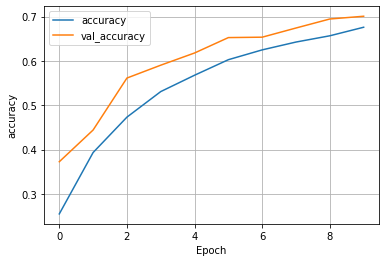

In [39]:
# Отображаем график точности обучения
plot_accuracy(history6)

с генератором модель показала хуже результат, чем без него (сравнивала после 10 эпох обучения)

продолжение в части 2